In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.datasets import load_wine
data = load_wine()
wine_data = data.data
wine_target=data.target
wine_feature_name = data.feature_names

In [ ]:
wine_df = pd.DataFrame(wine_data, columns = wine_feature_name)
wine_df.head(4)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0


앙상블 기법인 랜덤 포레스트 적용

In [ ]:
from sklearn.model_selection import cross_validate,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

cv = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
rc = RandomForestClassifier()
# 교차검증
score =  cross_validate(rc, wine_data, wine_target, return_train_score=True, cv=cv)


In [ ]:
score

{'fit_time': array([0.60030508, 0.70755839, 0.63725805, 0.70093536, 0.37978077]),
 'score_time': array([0.07472038, 0.04886413, 0.05958748, 0.05571556, 0.03783298]),
 'test_score': array([0.97222222, 0.94444444, 0.97222222, 0.97142857, 1.        ]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [ ]:
np.mean(score['train_score']),np.mean(score['test_score'])

(1.0, 0.9720634920634922)

In [ ]:
rc.fit(wine_data, wine_target)
rc.feature_importances_

array([0.14161428, 0.03305965, 0.01553394, 0.02988476, 0.02587264,
       0.03508047, 0.19448065, 0.00731033, 0.01838681, 0.17296111,
       0.07693904, 0.11183089, 0.13704541])

In [ ]:
# question?
# 가장 중요한 Feature순으로 top2만 출력
wine_importance = rc.feature_importances_
print(wine_importance)
wine_importance.sort()
list(reversed(wine_importance))

[0.14161428 0.03305965 0.01553394 0.02988476 0.02587264 0.03508047
 0.19448065 0.00731033 0.01838681 0.17296111 0.07693904 0.11183089
 0.13704541]


[0.19448065497563605,
 0.1729611145944593,
 0.14161428299811962,
 0.1370454123515224,
 0.11183089019193483,
 0.07693904064266104,
 0.03508046762610704,
 0.033059652025652426,
 0.02988475827441192,
 0.0258726446973373,
 0.018386807918194432,
 0.015533939876529991,
 0.007310333827433746]

In [ ]:
wine_importance = rc.feature_importances_
print(np.argsort(wine_importance))
print(np.argsort(wine_importance)[::-1])
top_down_index = np.argsort(wine_importance)[::-1]

[ 7  2  8  4  3  1  5 10 11 12  0  9  6]
[ 6  9  0 12 11 10  5  1  3  4  8  2  7]


In [ ]:
np.array(wine_feature_name)[top_down_index]

array(['flavanoids', 'color_intensity', 'alcohol', 'proline',
       'od280/od315_of_diluted_wines', 'hue', 'total_phenols',
       'malic_acid', 'alcalinity_of_ash', 'magnesium', 'proanthocyanins',
       'ash', 'nonflavanoid_phenols'], dtype='<U28')

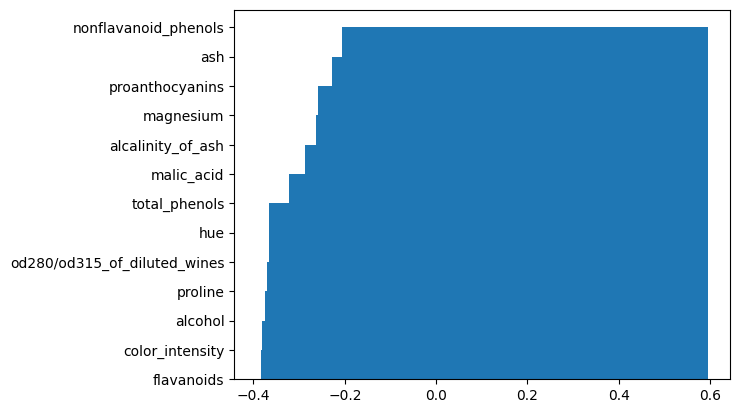

In [ ]:
import matplotlib.pyplot as plt
top_down_data = np.sort(wine_importance)
plt.bar(top_down_data, np.array(wine_feature_name)[top_down_index])
plt.show()

In [ ]:
oob_rc = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
oob_rc.fit(wine_data, wine_target)
oob_rc.oob_score_

0.9831460674157303

엑스트라 트리

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42)
cv =  StratifiedKFold(n_splits=10,shuffle=True)
scores = cross_validate(gbc,wine_data, wine_target,return_train_score=True, cv= cv)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.9326797385620915


In [ ]:
# 하나의 트리를 학습하고 잔차(오차)를 계산 그 오차를 새로운 타깃으로 설정해서 다음 트리에 업데이트
# 결국은 이러한 손실값을 줄여나가는 학습방법
# 손실값은 손실함수로 표현 가능하고.. 시각적으로 보면 2차원 그래프로 설명 가능
# n_estimators 일종의 학습 횟수의 역할을 한다
# 점진적으로 학습을 함. 반복하면 성능이 올라갈 수는 있지만 항상 올라가는 것은 아님
# 점진적으로 성능을 높이기 떄문에 과적합 발생 가능성 존재
gbc = GradientBoostingClassifier(n_estimators=200,learning_rate=0.01,random_state=42)
cv =  StratifiedKFold(n_splits=10,shuffle=True)
scores = cross_validate(gbc,wine_data, wine_target,return_train_score=True,cv=cv)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))


1.0 0.9326797385620915


XGBoost vs LightGBM

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(tree_method='hist',random_state = 42)
scores = cross_validate(xgb, wine_data, wine_target, return_train_score = True, n_jobs=-1)

print(np.mean(scores['train_score']),np.mean(scores['test_score']))

1.0 0.9498412698412698


In [ ]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state = 42)
scores = cross_validate(lgb, wine_data, wine_target, return_train_score = True, n_jobs=-1)

print(np.mean(scores['train_score']),np.mean(scores['test_score']))

1.0 0.9665079365079364


군집분석

In [2]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2024-05-01 08:55:17--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2024-05-01 08:55:17--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2024-05-01 08:55:18--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [8]:
fruits = np.load('/content/fruits_300.npy')
fruits.shape

(300, 100, 100)

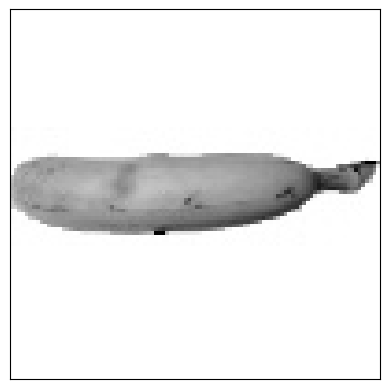

In [9]:
import matplotlib.pyplot as plt
# 넘파이 배열로 저장된 이미지 그리기
# 흑백 이미지이므로 cmap 매개변수를 gray로 줌 0에 가까울수록 검고 높은 값은 밝게 나타남->gray_r로 반전가느ㅜㅇ
plt.imshow(fruits[200],cmap='gray_r')
plt.xticks([]) ; plt.yticks([])
plt.show()
# fruits[0] 이런식으로도 확인 가능함

샘플 차원 변경

In [10]:
#  처음부터 100개의 샘플
fruits[0:100].shape

(100, 100, 100)

In [11]:
# 이미지를 구성하는 100 X 100을 1차원으로 변경
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:].reshape(-1, 100*100)

In [12]:
apple.shape, pineapple.shape, banana.shape

((100, 10000), (100, 10000), (100, 10000))

In [14]:
temp = [
    [1,2,3],
    [4,5,6]
]
np.mean(temp,axis=1)

array([2., 5.])

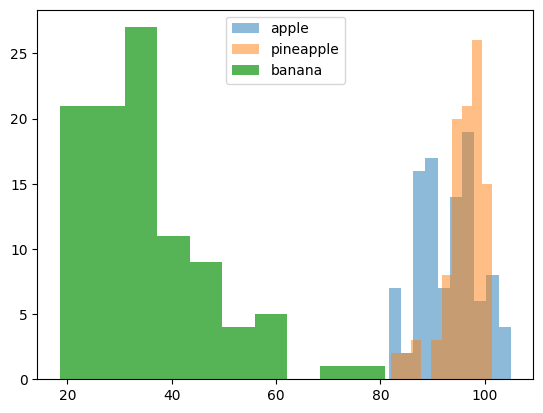

In [16]:
# 샘플마다 픽셀의 평균값을 계싼해야 하므로 mean()메서드가 평균을 계산할 축을 지정해야 함
# axis=0으로 하면 첫번째 축인 행을 따라 계산(인덱스 숫자랑 같음)
# 히스토그램 : 값이 발생한 빈도를 그래프로 표시한 것
plt.hist(np.mean(apple,axis=1), alpha = 0.5, label='apple')
plt.hist(np.mean(pineapple,axis=1), alpha = 0.5, label='pineapple')
plt.hist(np.mean(banana,axis=1), alpha = 0.8, label='banana')
plt.legend()
plt.show()

평균 이미지 데이터 및 시각화
 - 전체 이미지 - 평균 데이터 = 값이 가장 작은 순서부터 정렬하면
 - 전체 데이터가 각각 100개씩기므로 오차가 가장 작은 순서부터 정렬하면
- 전체 데이터가 각각 100개씩 이므로 오차가 가장 작은 순서로 100개 추출하면 해당 이미지와 가장 가까운 집합들이다.(군집/클러스터)

In [17]:
apple_mean = np.mean(apple, axis=0).reshape(100,100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100,100)
banana_mean = np.mean(banana,axis=0).reshape(100,100)

In [18]:
# 평균제곱오차 MSE
diff_pineapple_mean = fruits - pineapple_mean
diff_pineapple_mean.shape

(300, 100, 100)

In [19]:
fruits.shape,pineapple_mean.shape

((300, 100, 100), (100, 100))

In [20]:
# 제곱오차  SE
diff_pineapple_mean = np.square(fruits - pineapple_mean)
diff_pineapple_mean[0][(diff_pineapple_mean[0] < 0)]

array([], dtype=float64)

In [21]:
def fruits_mse(target_mean):
  # 평균제곱오차 MSE
  diff_target_mean = np.abs(fruits - target_mean)   # 절대값을 계산하는 함수 = np.absolute()
  # 배열을 입력하면 모든 원소의 절대값을 계산하여 입력과 동일한 크기의 배열을 반
  mse_pineapple = np.mean(diff_pineapple_mean, axis = (1,2))    # 이미 구한 제곱 오차 평균
  # 가장 오차가 적은 100개의 인덱스를 추출
  return np.argsort(mse_pineapple)[:100]

In [22]:
apple_index = fruits_mse(apple_mean)
pineapple_index = fruits_mse(pineapple_mean)
banana_index = fruits_mse(banana_mean)

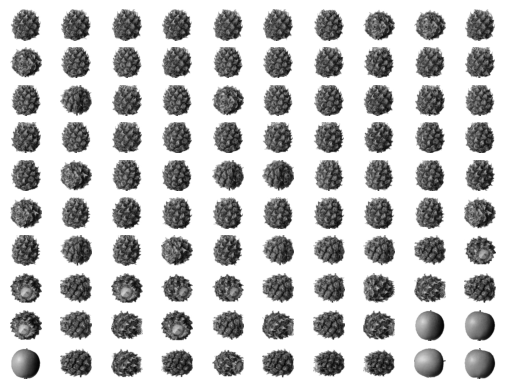

In [23]:
def show_mean_image(index):
    fig, ax = plt.subplots(10, 10)
    for idx, data in enumerate(fruits[index]):
        ax[idx // 10, idx % 10].imshow(data, cmap='gray_r')
        ax[idx // 10, idx % 10].axis('off')
    plt.show()

show_mean_image(banana_index)


KMeans

In [24]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
fruits_2d = fruits.reshape(-1,100*100)
km.fit(fruits_2d)
print(np.unique(km.labels_,return_counts=True))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2], dtype=int32), array([111,  98,  91]))


In [25]:
np.unique(km.labels_,return_counts=True)

(array([0, 1, 2], dtype=int32), array([111,  98,  91]))

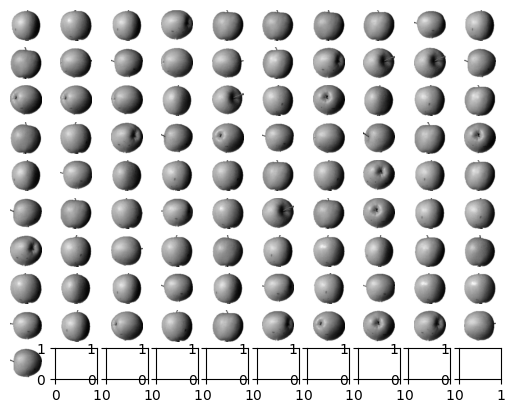

In [26]:
# np.where( km.labels_ == 0)
show_mean_image(np.where( km.labels_ == 2))

최적의 K 찾기


In [27]:
# 첫번째 클러스터
# 클러스트의 중심
# 최적의 k찾기******

In [28]:
inertia=[]
for k in range(2,7):
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

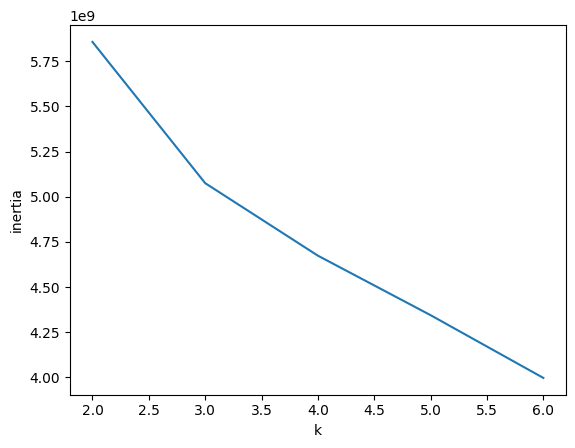

In [29]:
plt.plot(range(2,7),inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()